In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft
from scipy.signal import savgol_filter
%matplotlib notebook

# Experiment

In [4]:
filename2 = '150cm/150cm_2_data_MQTT_2024-05-12.csv'
df = pd.read_csv(f"Free Drop/{filename2}")

# Split data from both sensors respectively
adxl_data = df[df['sensor_name'] == 'ADXL345']
mpu_data = df[df['sensor_name'] == 'MPU6050_A']

In [5]:
adxl_data.describe()

,timestamp,acceleration_x,acceleration_y,acceleration_z,acceleration_magnitude
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,2235.000000,-0.326365,-3.572236,9.120446,9.810872
std,326.917421,0.247433,0.434964,0.436064,0.484299
min,1680.000000,-0.862985,-5.021005,7.845320,8.715370
25%,1957.500000,-0.470719,-3.765754,8.865211,9.531821
50%,2235.000000,-0.392266,-3.530394,9.100572,9.766715
75%,2512.500000,-0.117680,-3.373488,9.414384,10.082839
max,2790.000000,0.235360,-2.510502,10.434276,11.446911


In [6]:
mpu_data.describe()

,timestamp,acceleration_x,acceleration_y,acceleration_z,acceleration_magnitude
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,2235.000000,0.257584,-0.196516,10.077259,10.087332
std,326.917421,0.304111,0.043693,0.217327,0.205287
min,1680.000000,-0.490811,-0.294487,9.284714,9.376299
25%,1957.500000,0.147243,-0.227449,10.011354,10.019273
50%,2235.000000,0.232238,-0.193930,10.096349,10.100790
75%,2512.500000,0.312443,-0.172383,10.177752,10.182237
max,2790.000000,1.273715,-0.055067,10.723629,10.734776


<IPython.core.display.Javascript object>


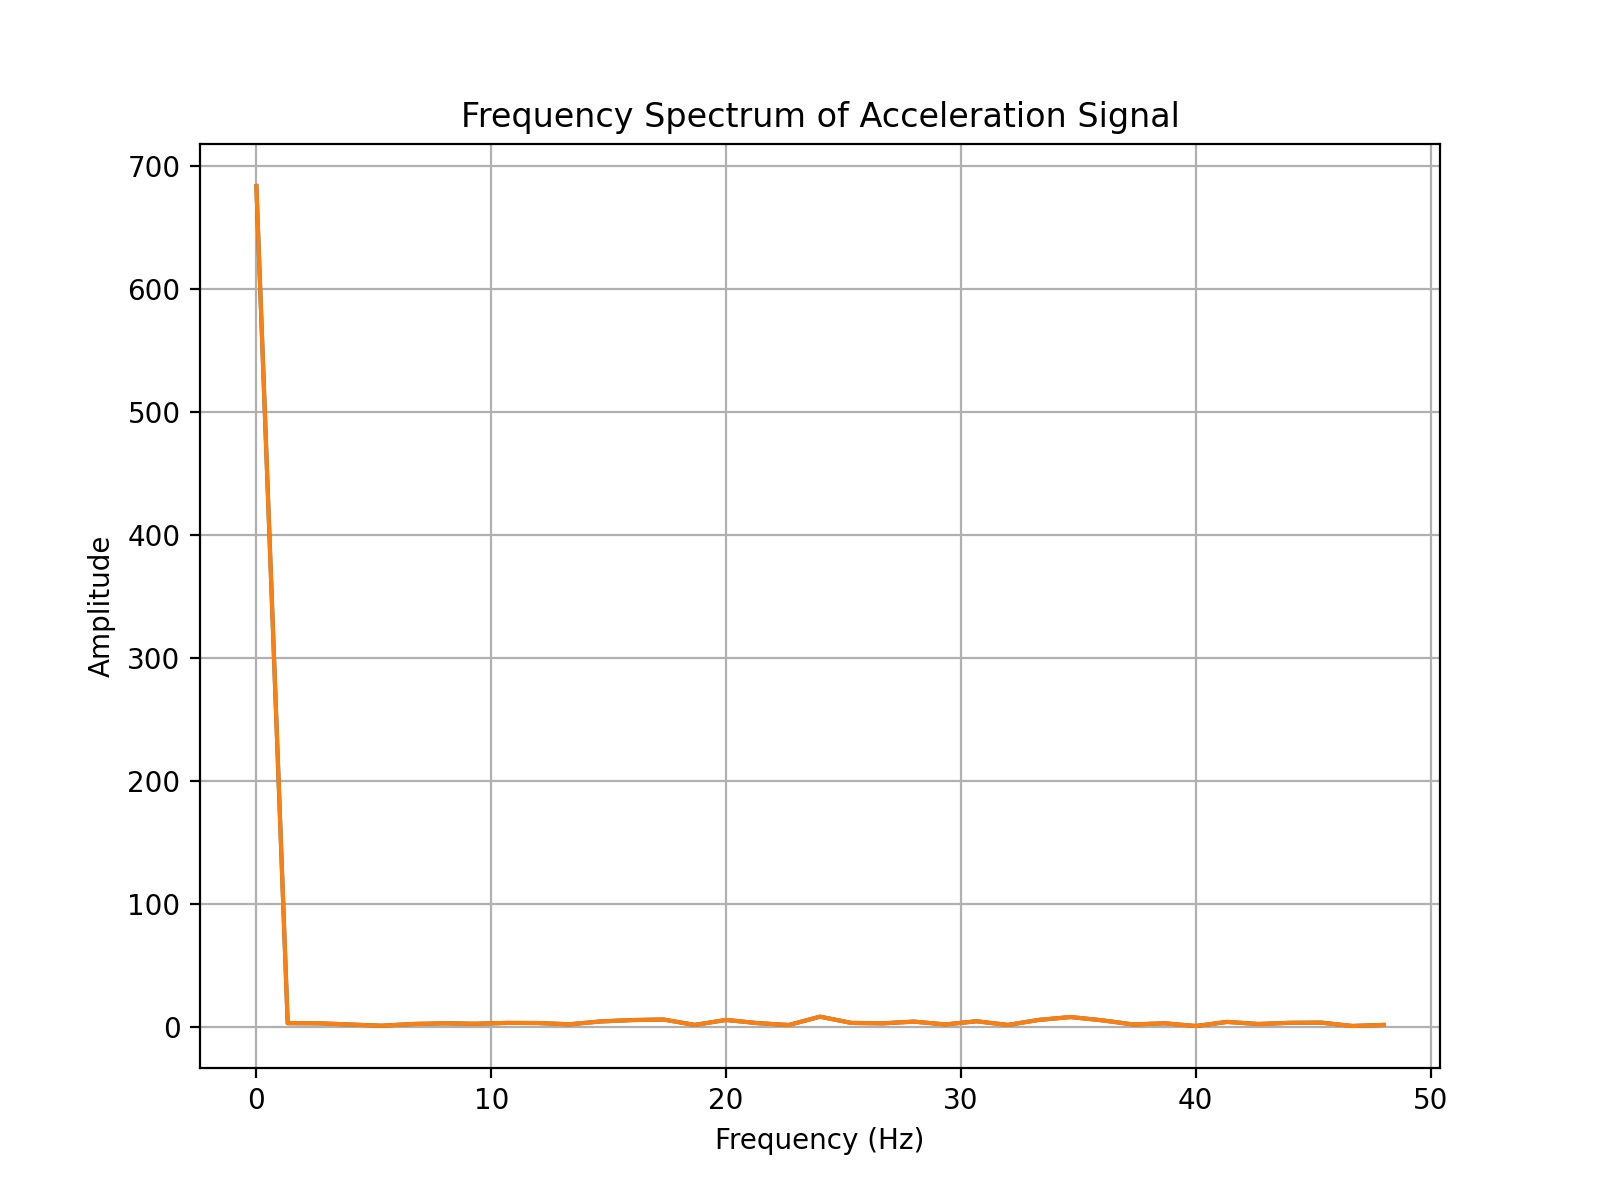

In [11]:
sampling_rate = 100  # Sampling rate in Hz
freq_spectrum_adxl = np.fft.fft(adxl_data['acceleration_z'])
freq_axis_adxl = np.fft.fftfreq(len(mpu_data['acceleration_z']), d=1/sampling_rate)
freq_spectrum_mpu = np.fft.fft(adxl_data['acceleration_z'])
freq_axis_mpu = np.fft.fftfreq(len(mpu_data['acceleration_z']), d=1/sampling_rate)

# Plot frequency spectrum
plt.figure(figsize=(8, 6))
plt.plot(freq_axis_adxl[:len(freq_axis_adxl)], np.abs(freq_spectrum_adxl)[:len(freq_spectrum_adxl)])
plt.plot(freq_axis_mpu[:len(freq_axis_mpu)], np.abs(freq_spectrum_mpu)[:len(freq_spectrum_mpu)])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum of Acceleration Signal')
plt.grid(True)
plt.show()
